In [1]:
import sys
sys.path.append('..')

In [2]:
from config_simulation import (
    algorithms,
    batch_size_power,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
)

SGD = algorithms.SGD
WASGD = algorithms.WASGD
SNARiccati = algorithms.SNARiccati
WASNARiccati = algorithms.WASNARiccati
USNA = algorithms.USNA
UWASNA = algorithms.UWASNA
SNA = algorithms.SNA
WASNA = algorithms.WASNA


N = 20
n = 10_000

optimizer_list = [
    WASGD(tau=0.0),  # ASGD
    WASGD(),
    SNA(),
    WASNA(),
    USNA(c_nu=5.0),
    USNA(c_nu=5.0, generate_Z="normal"),
    UWASNA(c_nu = 5.0),
    UWASNA(c_nu = 5.0, generate_Z="normal"),
]

if batch_size_power== 0:
    import copy
    optimizer_list_with_riccati = copy.deepcopy(optimizer_list)
    optimizer_list_with_riccati[2] = SNARiccati()
    optimizer_list_with_riccati[3] = WASNARiccati()
else:
    optimizer_list_with_riccati = optimizer_list



In [3]:
N = 2
n = 1_000

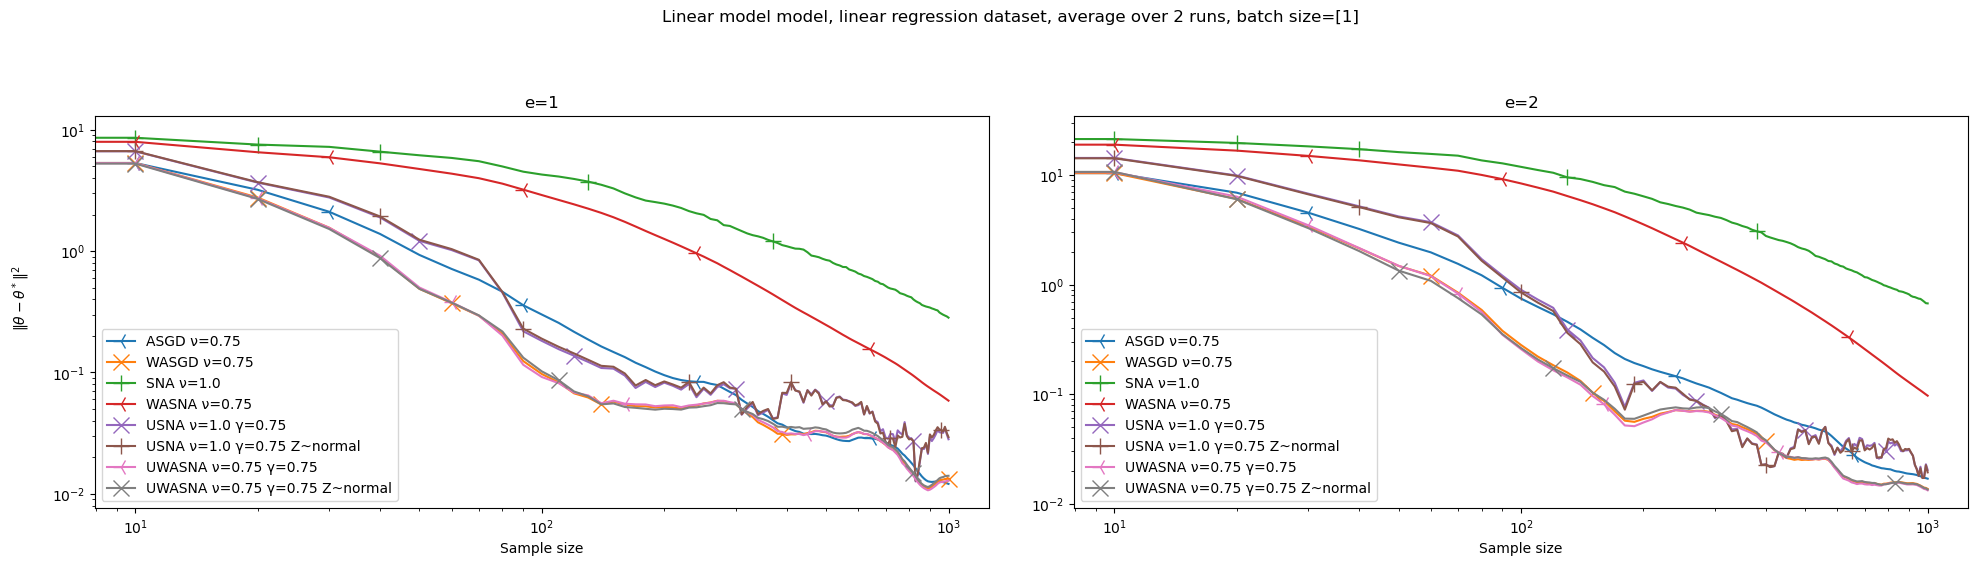

In [4]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list_with_riccati)
simulation.run_multiple_track_errors(N=N, n=n)

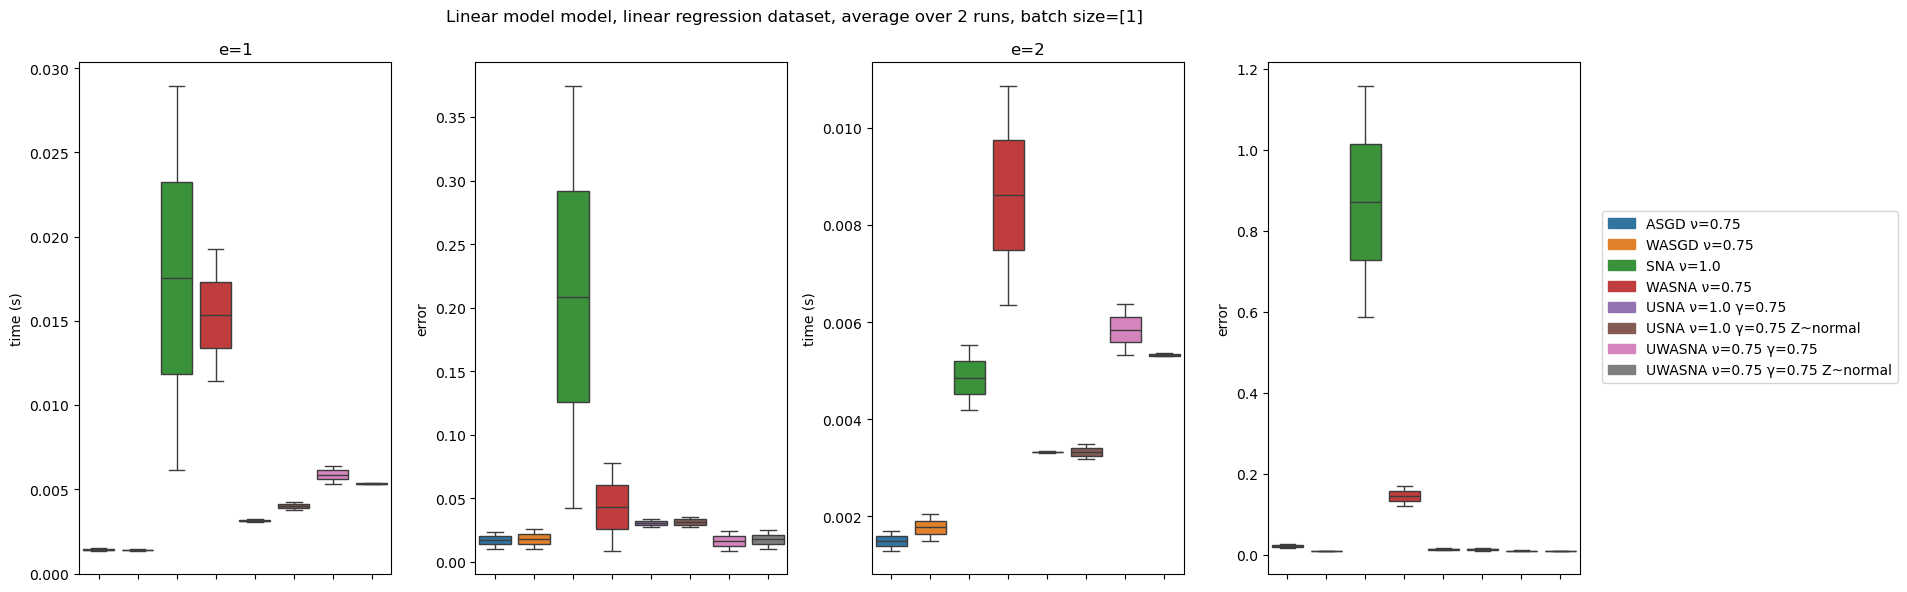

In [5]:
simulation.run_multiple_track_time(N=N, n=n)

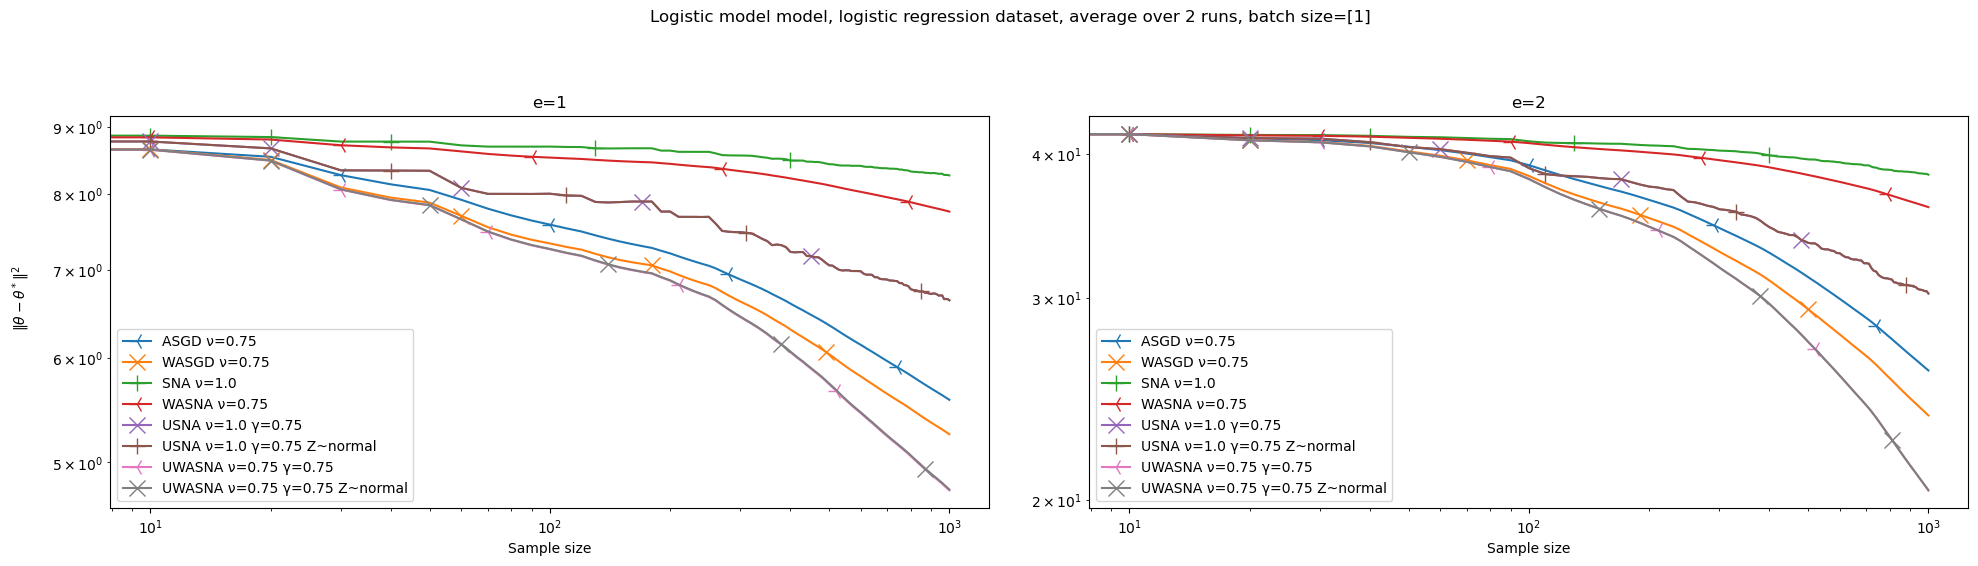

In [6]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list_with_riccati)
simulation.run_multiple_track_errors(N=N, n=n)

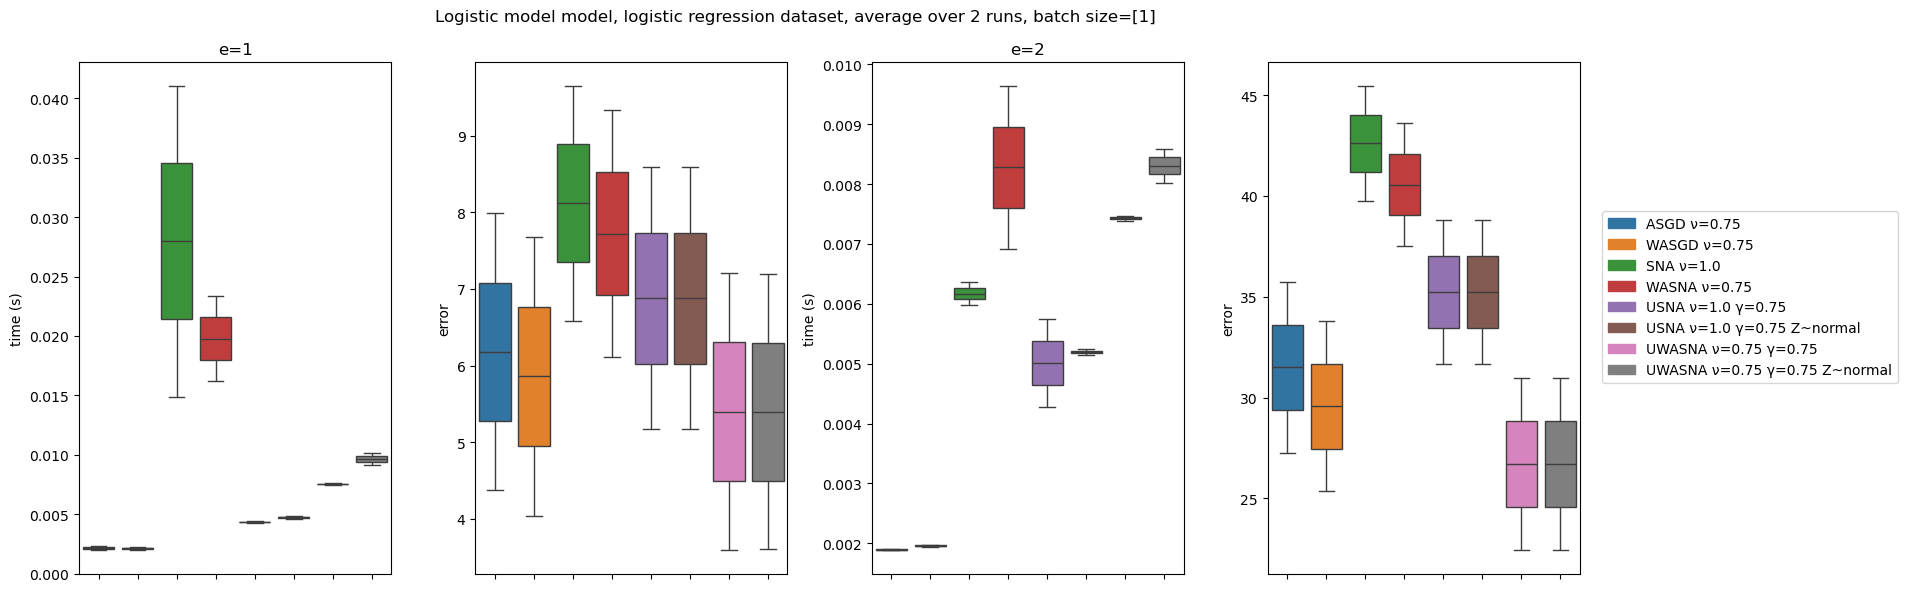

In [7]:
simulation.run_multiple_track_time(N=N, n=n)

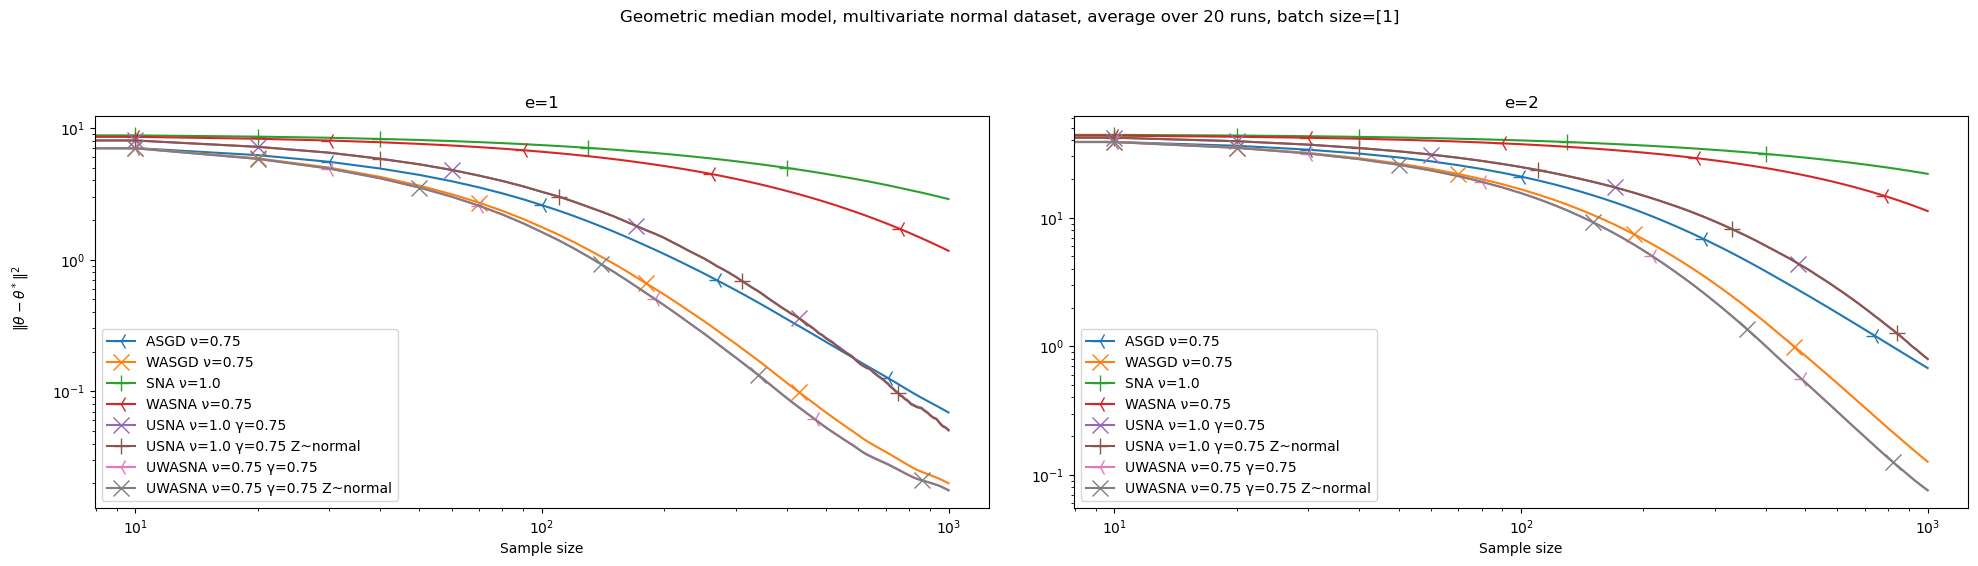

In [8]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list_with_riccati)
simulation.run_multiple_track_errors(N=20, n=n)

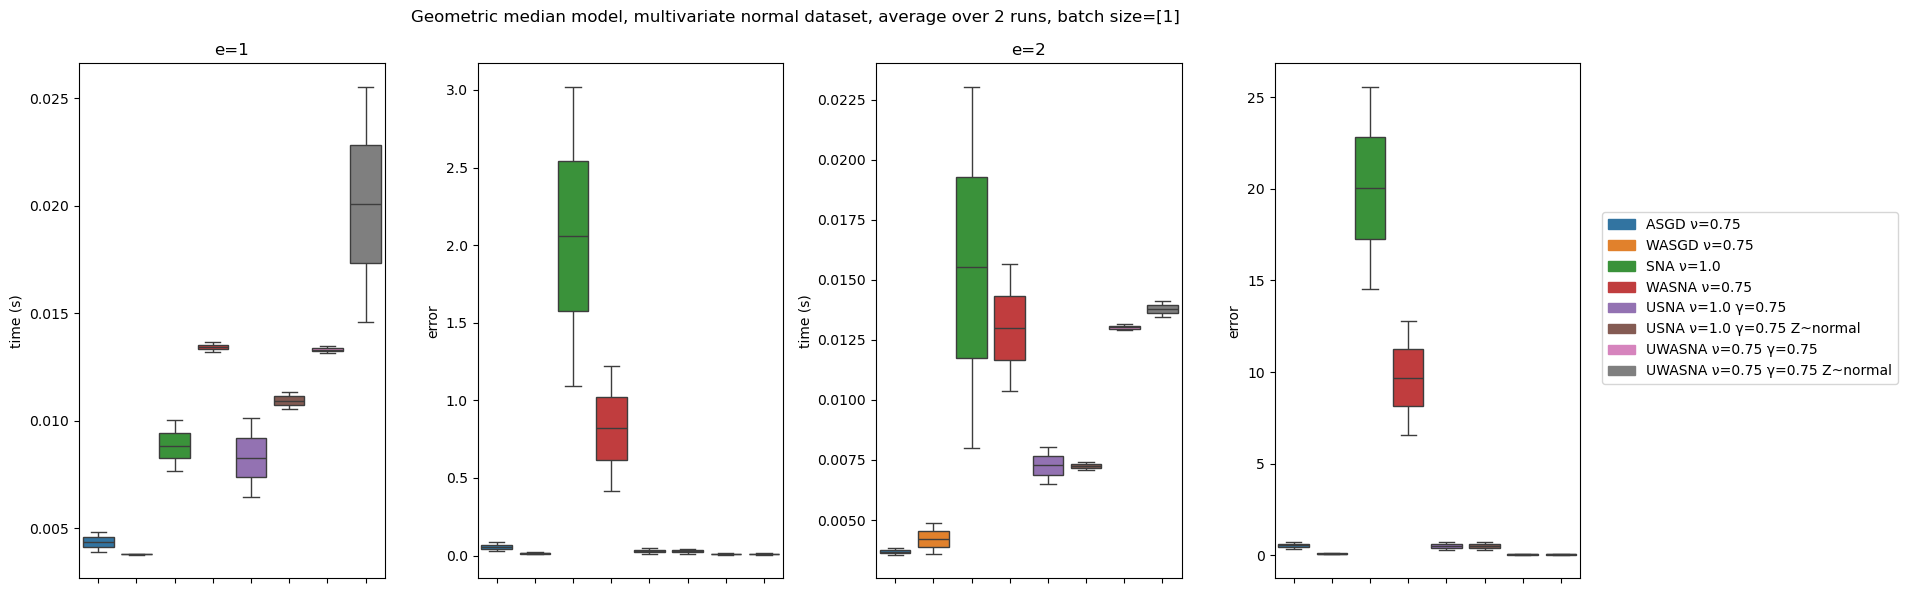

In [9]:
simulation.run_multiple_track_time(N=N, n=n)

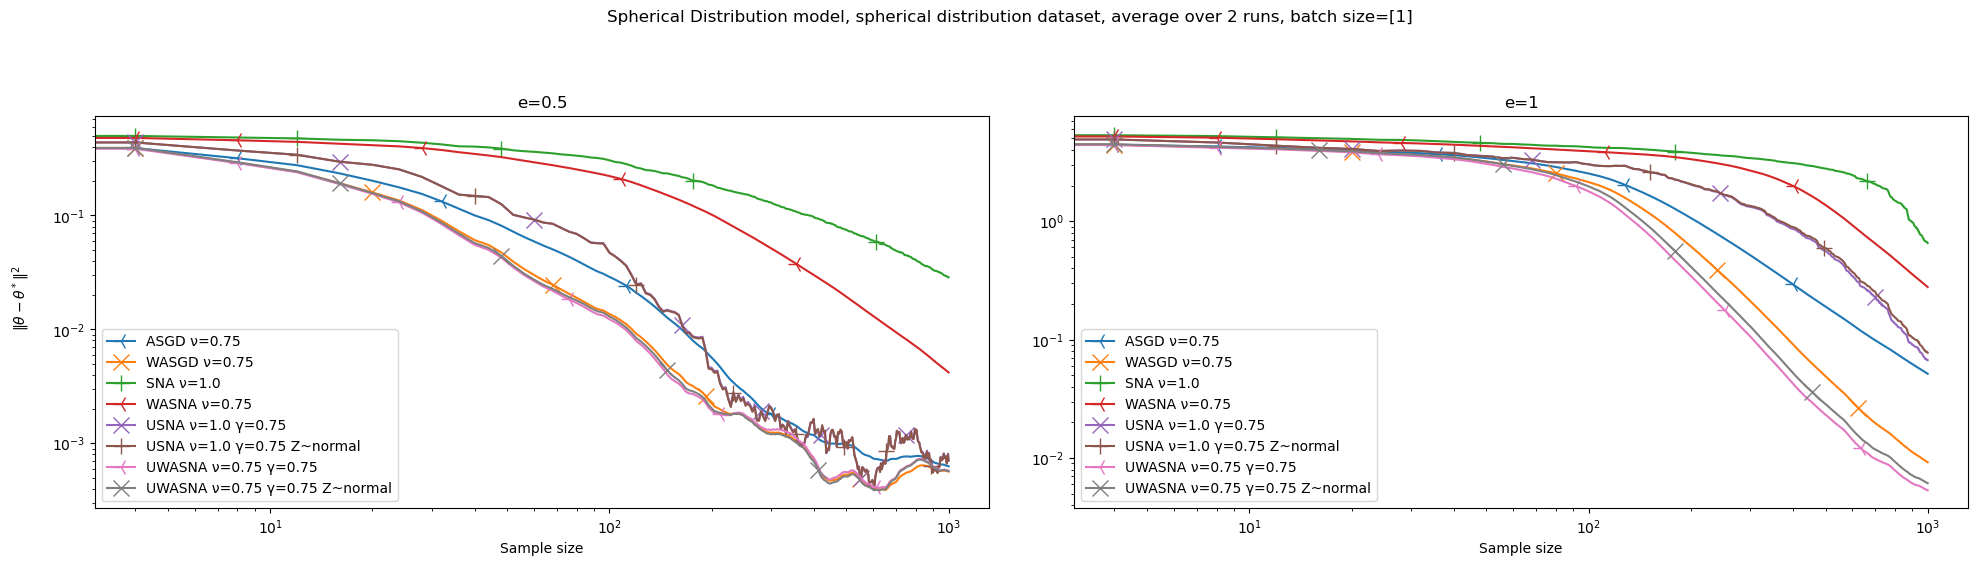

In [10]:
simulation = simulation_spherical_distribution(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

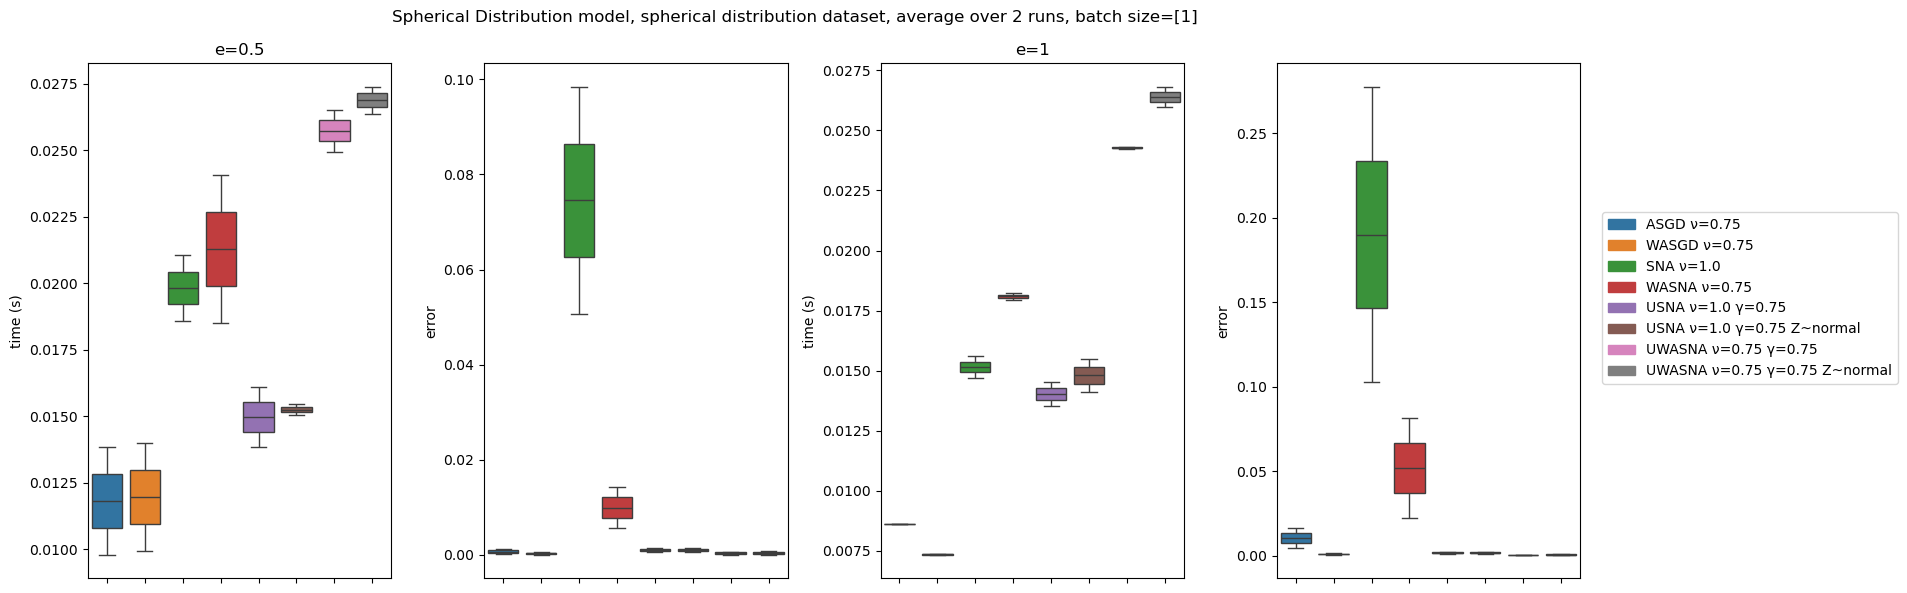

In [11]:
simulation.run_multiple_track_time(N=N, n=n)

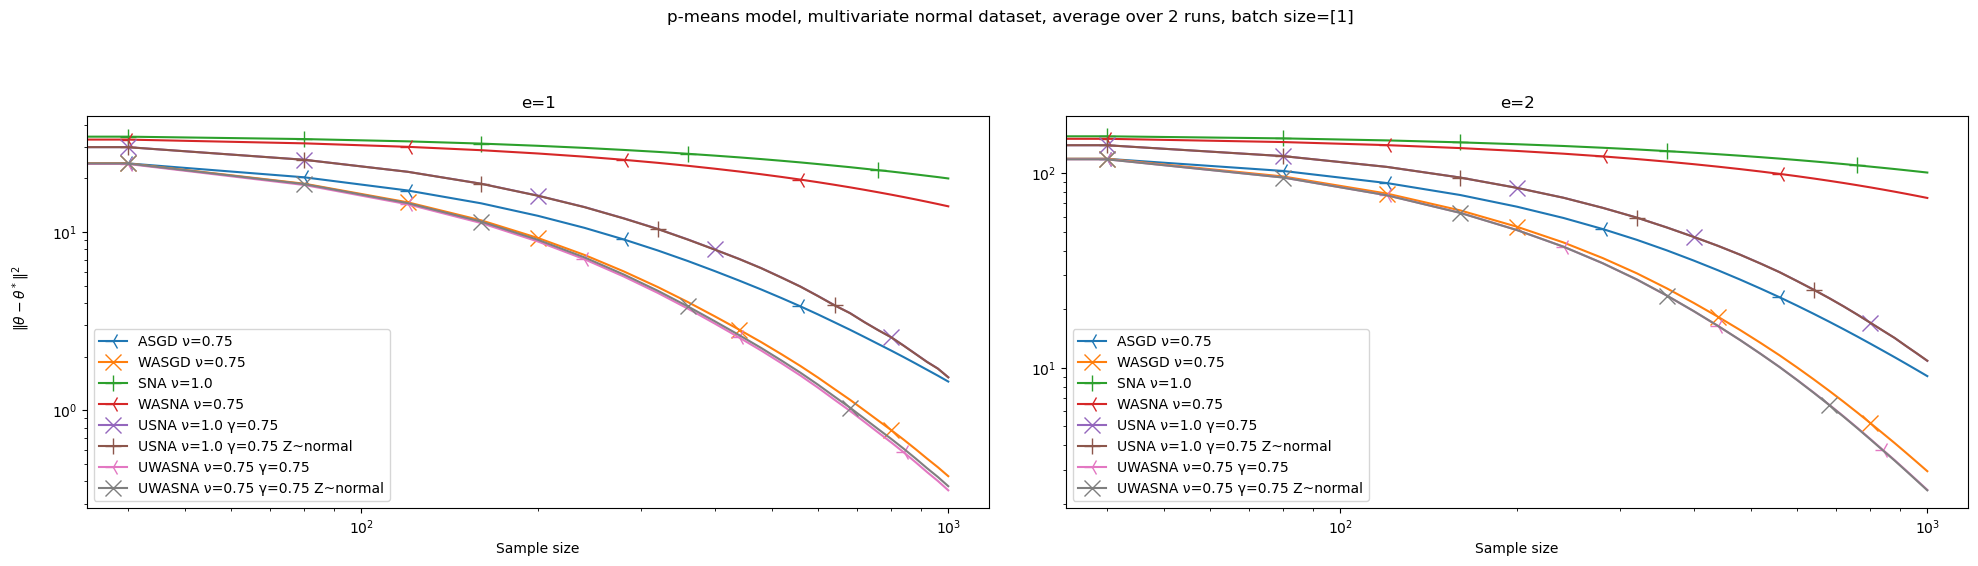

In [12]:
simulation = simulation_p_means(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

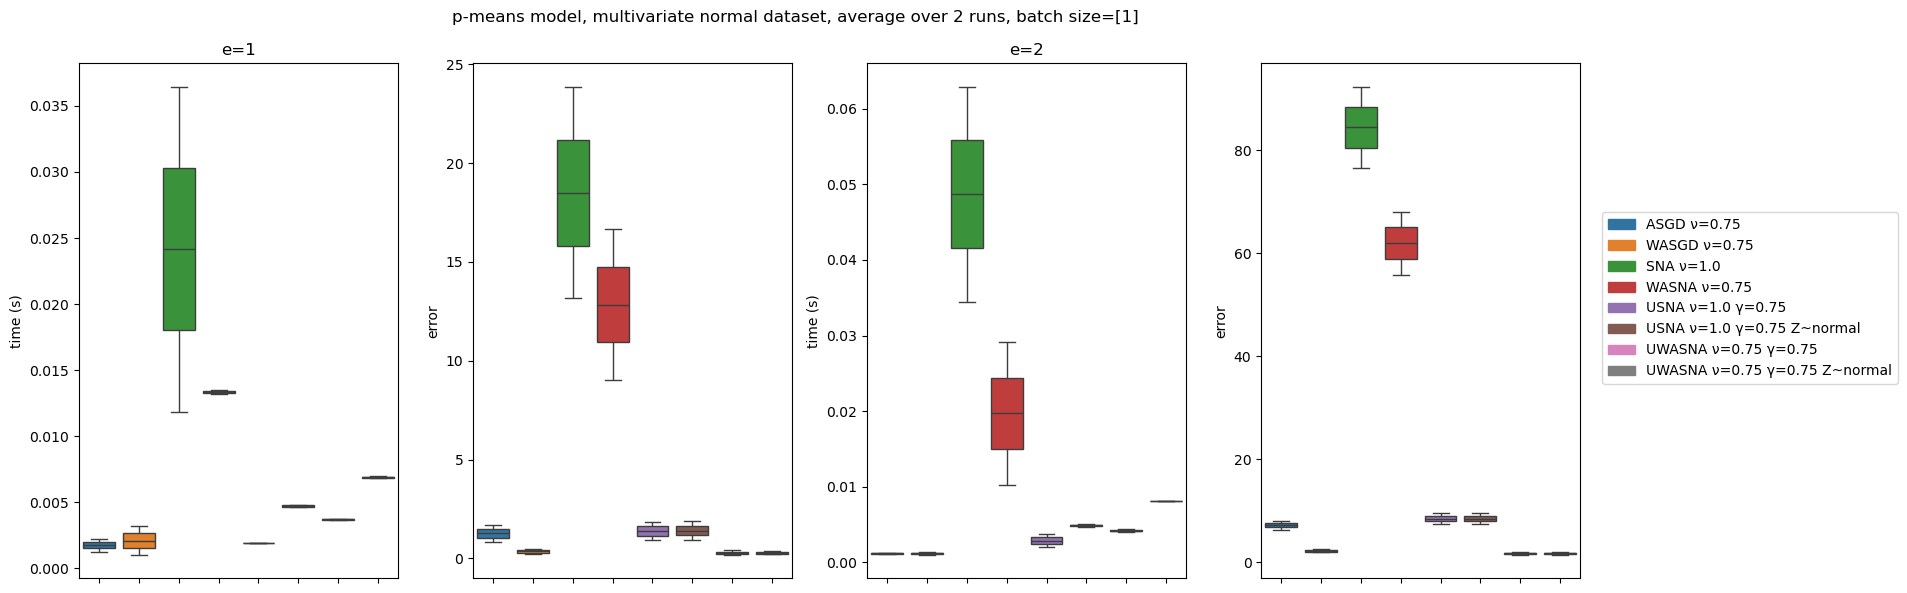

In [13]:
simulation.run_multiple_track_time(N=N, n=n)

In [14]:
eval = eval_covtype(optimizer_list=optimizer_list_with_riccati)
_, _ = eval.run_track_time()

,ASGD ν=0.75,WASGD ν=0.75,SNA ν=1.0,WASNA ν=0.75,USNA ν=1.0 γ=0.75,USNA ν=1.0 γ=0.75 Z~normal,UWASNA ν=0.75 γ=0.75,UWASNA ν=0.75 γ=0.75 Z~normal
Training Accuracy,0.651855,0.672285,0.758716,0.762832,0.459191,0.628931,0.654994,0.654148
Test Accuracy,0.653365,0.675464,0.759920,0.764016,0.459291,0.630621,0.656876,0.655956
